## Observations and Insights

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
# Read the mouse data and the study results
mouse_metadata = pd.read_csv("data/Mouse_metadata.csv")
study_results = pd.read_csv("data/Study_results.csv")

# Combine the data into a single dataset
combined_df = pd.merge(mouse_metadata, study_results, on="Mouse ID", how="outer")

# Display the data table for preview
combined_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [3]:
# Checking the number of mice.
combined_df["Mouse ID"].nunique()

249

In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

# Create a copy first to not mess up the combined_df
cleaned_df = combined_df.copy()

# Drop duplicates by Mouse ID and Timepoint
cleaned_df.drop_duplicates(subset=["Mouse ID", "Timepoint"], keep='first', inplace=True)

# Checking the number of mice in the clean DataFrame.
cleaned_df["Mouse ID"].nunique()

# # Export cleaned_df # Just for easier checking on results
# cleaned_df.to_csv("data/cleaned_df.csv", index=False, header=True)

249

In [5]:
# Display the data table for preview
cleaned_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


## Summary Statistics

In [6]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.
drug_regimen_df = cleaned_df.groupby("Drug Regimen")

tumor_avg = drug_regimen_df["Tumor Volume (mm3)"].mean().map('{:.2f}'.format)
tumor_med = drug_regimen_df["Tumor Volume (mm3)"].median().map('{:.2f}'.format)
tumor_var = drug_regimen_df["Tumor Volume (mm3)"].var().map('{:.2f}'.format)
tumor_std = drug_regimen_df["Tumor Volume (mm3)"].std().map('{:.2f}'.format)
tumor_sem = drug_regimen_df["Tumor Volume (mm3)"].sem().map('{:.2f}'.format)

summary_stats = pd.DataFrame({
                            "Mean" : tumor_avg,
                            "Median" : tumor_med,
                            "Variance" : tumor_var,
                            "STD" : tumor_std,
                            "SEM" : tumor_sem
                            })

# Display the Summary statistics table grouped by 'Drug Regimen' column
summary_stats

,Mean,Median,Variance,STD,SEM
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60
Placebo,54.03,52.29,61.17,7.82,0.58
Propriva,52.39,50.91,43.14,6.57,0.53
Ramicane,40.22,40.67,23.49,4.85,0.32
Stelasyn,54.23,52.43,59.45,7.71,0.57


In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Using the aggregation method, produce the same summary statistics in a single line
summary_stats_agg = cleaned_df.groupby("Drug Regimen").agg(
    Mean = ("Tumor Volume (mm3)", np.mean),
    Median = ("Tumor Volume (mm3)", np.median),
    Variance = ("Tumor Volume (mm3)", np.var),
    STD = ("Tumor Volume (mm3)", np.std),
    SEM = ("Tumor Volume (mm3)", st.sem)
    ).round(2)

# summary_stats_agg = cleaned_df.groupby(["Drug Regimen"]).agg({"Tumor Volume (mm3)": ['mean', 'median', 'var', 'std', 'sem']}).round(2)
# ^^^^ This will be cleaner, but the column name will be different
# Display the Summary statistics table grouped by 'Drug Regimen' column
summary_stats_agg

,Mean,Median,Variance,STD,SEM
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60
Placebo,54.03,52.29,61.17,7.82,0.58
Propriva,52.39,50.91,43.14,6.57,0.53
Ramicane,40.22,40.67,23.49,4.85,0.32
Stelasyn,54.23,52.43,59.45,7.71,0.57


## Bar and Pie Charts

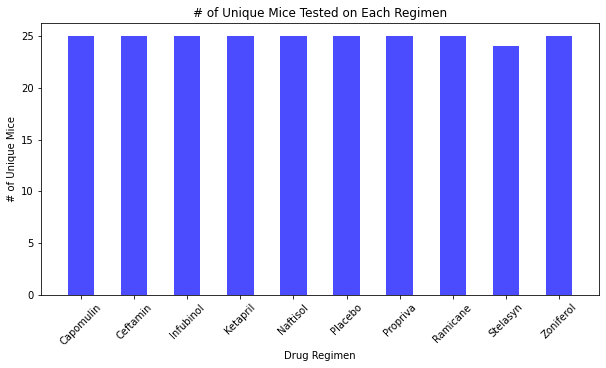

<Figure size 432x288 with 0 Axes>

In [8]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.
plt.figure(figsize=(10,5)) # Set figure size for better displaying
drug_regimen_df["Mouse ID"].nunique().plot(kind="bar", color="b", width=0.5, alpha=0.7, align="center")
plt.xticks(rotation=45)
plt.xlim(-0.75, len(drug_regimen_df["Mouse ID"].nunique())-0.25)
plt.title("# of Unique Mice Tested on Each Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("# of Unique Mice")
plt.show()
plt.tight_layout()


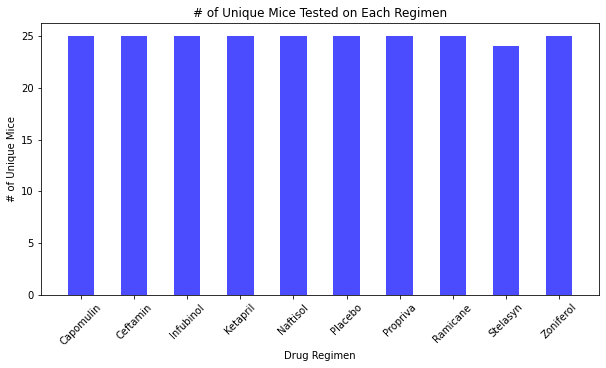

<Figure size 432x288 with 0 Axes>

In [9]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.
# x_axis = np.arange(len(drug_regimen_df["Mouse ID"].nunique())) # Just to record my trial and error thought process
regimens_list = summary_stats.index.tolist()
X_axis = regimens_list
plt.figure(figsize=(10,5)) # Set figure size for better displaying
plt.bar(X_axis, drug_regimen_df["Mouse ID"].nunique(), color="b", width=0.5, alpha=0.7, align="center")
plt.xticks(rotation=45)
plt.xlim(-0.75, len(drug_regimen_df["Mouse ID"].nunique())-0.25)
plt.title("# of Unique Mice Tested on Each Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("# of Unique Mice")
plt.show()
plt.tight_layout()

In [10]:
# Groupby sex using cleaned data
gender_df = cleaned_df.groupby("Sex").count()

# Setting up labels
pie_label = gender_df.index

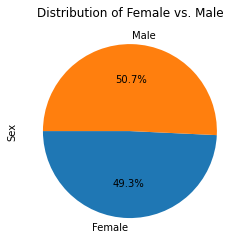

<Figure size 432x288 with 0 Axes>

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender_df["Mouse ID"].plot(kind="pie", autopct="%1.1f%%", startangle=180)
plt.title("Distribution of Female vs. Male")
plt.ylabel("Sex")
plt.show()
plt.tight_layout()

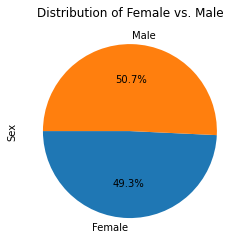

<Figure size 432x288 with 0 Axes>

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(gender_df["Mouse ID"], labels=pie_label, autopct="%1.1f%%", startangle=180)
plt.title("Distribution of Female vs. Male")
plt.ylabel("Sex")
plt.show()
plt.tight_layout()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
treatment_regimens = cleaned_df[cleaned_df["Drug Regimen"].isin(["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])]
last_timepoint = treatment_regimens.groupby("Mouse ID").max()["Timepoint"]
last_timepoint_df = pd.DataFrame(last_timepoint)

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
completed_last_timepoint_df = pd.merge(last_timepoint_df, cleaned_df, on=("Mouse ID","Timepoint"), how="left")

# Display the table for easier reference
completed_last_timepoint_df

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a275,45,Ceftamin,Female,20,28,62.999356,3
3,a411,45,Ramicane,Male,3,22,38.407618,1
4,a444,45,Ramicane,Female,10,25,43.047543,0
...,...,...,...,...,...,...,...,...
95,y769,45,Ceftamin,Female,6,27,68.594745,4
96,y793,45,Capomulin,Male,17,17,31.896238,2
97,y865,45,Ceftamin,Male,23,26,64.729837,3
98,z578,45,Ramicane,Male,11,16,30.638696,0


In [15]:
# # Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# # Create empty list to fill with tumor vol data (for plotting)
tumor_vol = []

# Locate the rows which contain mice on each drug and get the tumor volumes


# Locate using .loc
# Loop through regimens for outlier calculations
for regimens in treatments:
    treatment_tumor_vol = completed_last_timepoint_df.loc[completed_last_timepoint_df["Drug Regimen"] == regimens, "Tumor Volume (mm3)"]

    # Round it up to 2 decimal places
    quartiles = treatment_tumor_vol.quantile([.25,.5,.75]).round(2)
    lowerq = quartiles[0.25].round(2)
    upperq = quartiles[0.75].round(2)
    iqr = round(upperq-lowerq, 2)
    lower_bound = (lowerq - (1.5*iqr)).round(2) 
    upper_bound = (upperq + (1.5*iqr)).round(2)

    # Determine outliers using upper and lower bounds
    print(f"--------------------------------------------------------")
    print(f"The IQR data for {regimens}:")
    print(f" ")
    print(f"The lower quartile: {lowerq}")
    print(f"The upper quartile: {upperq}")
    print(f"The IQR: {iqr}")
    print(f" ")
    print(f"***Tumors smaller than {lower_bound}(mm3) would be outliers.")
    print(f"***Tumors bigger than {upper_bound}(mm3) would be outliers.")
    
    # Append tumor volume to empty list # Add subset
    tumor_vol.append(treatment_tumor_vol)


--------------------------------------------------------
The IQR data for Capomulin:
 
The lower quartile: 32.38
The upper quartile: 40.16
The IQR: 7.78
 
***Tumors smaller than 20.71(mm3) would be outliers.
***Tumors bigger than 51.83(mm3) would be outliers.
--------------------------------------------------------
The IQR data for Ramicane:
 
The lower quartile: 31.56
The upper quartile: 40.66
The IQR: 9.1
 
***Tumors smaller than 17.91(mm3) would be outliers.
***Tumors bigger than 54.31(mm3) would be outliers.
--------------------------------------------------------
The IQR data for Infubinol:
 
The lower quartile: 54.05
The upper quartile: 65.53
The IQR: 11.48
 
***Tumors smaller than 36.83(mm3) would be outliers.
***Tumors bigger than 82.75(mm3) would be outliers.
--------------------------------------------------------
The IQR data for Ceftamin:
 
The lower quartile: 48.72
The upper quartile: 64.3
The IQR: 15.58
 
***Tumors smaller than 25.35(mm3) would be outliers.
***Tumors bigg

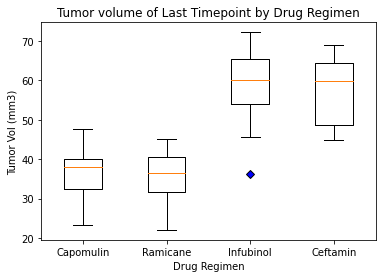

<Figure size 432x288 with 0 Axes>

In [16]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
# fig1, ax = plt.subplots()
# ax.set_title("Tumor volume of Last Timepoint by Drug Regimen")
# ax.set_xlabel("Drug Regimen")
# ax.set_ylabel("Tumor Vol (mm3)")
# blue_diamond = dict(markerfacecolor = "b", marker = "D")
# ax.boxplot(tumor_vol, flierprops = blue_diamond) # revisit
# plt.xticks([1, 2, 3, 4], treatments)
# plt.show()
# plt.tight_layout()
# ^^^ revisit


plt.subplots()
plt.title("Tumor volume of Last Timepoint by Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Tumor Vol (mm3)")
blue_diamond = dict(markerfacecolor = "b", marker = "D")
plt.boxplot(tumor_vol, flierprops = blue_diamond)
plt.xticks([1, 2, 3, 4], treatments)
plt.show()
plt.tight_layout()

## Line and Scatter Plots

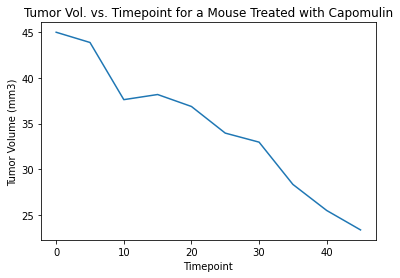

<Figure size 432x288 with 0 Axes>

In [17]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

# Find first mouse ID treated with Capomulin
capo_mouse = cleaned_df["Mouse ID"][cleaned_df["Drug Regimen"] == "Capomulin"].values[0]

capo_mouse_tumor_vol = cleaned_df.loc[cleaned_df["Mouse ID"] == capo_mouse , "Tumor Volume (mm3)"]
capo_mouse_timepoint = cleaned_df.loc[cleaned_df["Mouse ID"] == capo_mouse , "Timepoint"]

plt.plot(capo_mouse_timepoint, capo_mouse_tumor_vol)
plt.title("Tumor Vol. vs. Timepoint for a Mouse Treated with Capomulin")
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.show()
plt.tight_layout()


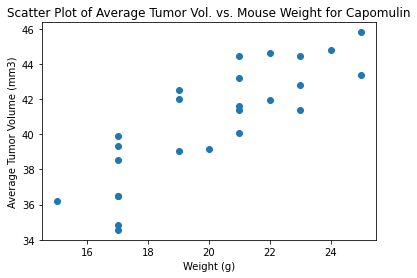

<Figure size 432x288 with 0 Axes>

In [18]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

# Create a df containing only  mice treated with Capomulin and average out values for all columns
treatment_capo = cleaned_df[cleaned_df["Drug Regimen"].isin(["Capomulin"])]
capo_avg = treatment_capo.groupby("Mouse ID").mean()
capo_avg_df = pd.DataFrame(capo_avg)


capo_weight = capo_avg_df["Weight (g)"]
capo_tumor_vol = capo_avg_df["Tumor Volume (mm3)"]

plt.scatter(capo_weight, capo_tumor_vol)
plt.title("Scatter Plot of Average Tumor Vol. vs. Mouse Weight for Capomulin")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()
plt.tight_layout()

## Correlation and Regression

In [19]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
correl = round(st.pearsonr(capo_weight, capo_tumor_vol)[0], 2)
print(f"The correlation between mouse weight and average tumor volume: {correl}")

The correlation between mouse weight and average tumor volume: 0.84


In [20]:
# Calculate model
model = st.linregress(capo_weight, capo_tumor_vol)
# Display to locate the position of results
model

LinregressResult(slope=0.9544396890241045, intercept=21.552160532685015, rvalue=0.8419363424694718, pvalue=1.3225722434712642e-07, stderr=0.1275435903320134)

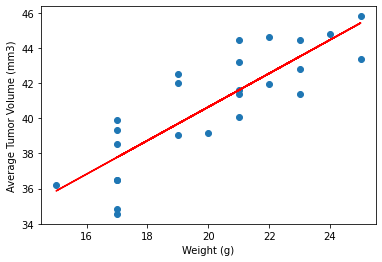

<Figure size 432x288 with 0 Axes>

In [21]:
# Use above results to build a plot including linear regression model
slope = model[0]
intercept = model[1]
regress_values = (capo_weight * slope) + intercept
# I tried to show the line_eq but don't know how to position it
# line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2)) 
plt.scatter(capo_weight, capo_tumor_vol)
plt.plot(capo_weight, regress_values, color = "r")
# plt.annotate(line_eq, (5, 5), fontsize=15, color="red") # don't know how to position it
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")

plt.show()
plt.tight_layout()